## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [329]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [330]:
X =np.array([*range(21)])
X

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [331]:
a = -1
b = 2
Y = a * X + b
Y

array([  2,   1,   0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10,
       -11, -12, -13, -14, -15, -16, -17, -18])

#### Plot your data points. 

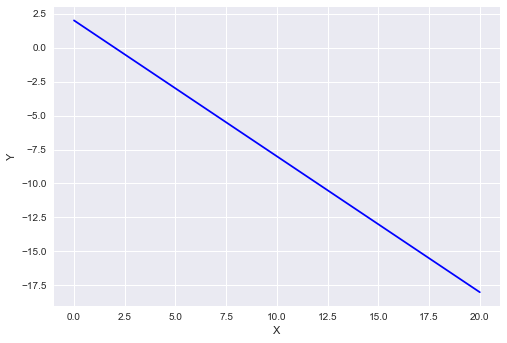

In [332]:
plt.style.use("seaborn")
plt.plot(X, Y, color="blue")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

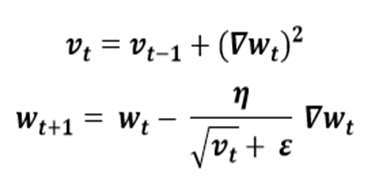

In [333]:
def adagrad(x, y, alpha, epslon, itera, b):
    theta_all = []
    cost = []
    h_theta_all = []
    X = np.array([float(i) for i in x])
    Y = np.array([float(i) for i in y])
    theta = np.array([0.0,0.0])
    Vt = np.array([0.0,0.0])
    cost_new = 0
    cost_func = 0
    n = len(X)
    feature = np.array([np.ones(n),X]).T
    h_theta = feature.dot(theta)
    j = 0
    while ((j < itera) and (abs(cost_new)> 0.01 or j == 0)):
        cost_func = cost_new
        for i in range(0,int(n/b)):

            Wt_0 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),0])

            Vt[0] = Vt[0] + (Wt_0)**2
            theta[0] = theta[0] - (alpha / (np.sqrt(Vt[0]) + epslon)) * Wt_0
            #====================================================#

            Wt_1 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),1])

            Vt[1] = Vt[1] + (Wt_1)**2
            theta[1] = theta[1] - (alpha / (np.sqrt(Vt[1]) + epslon)) * Wt_1

            h_theta = feature.dot(theta)
            
            cost_new = (1/(2*n))*sum((h_theta - Y)**2)
        theta_all.append([theta[0],theta[1]])
        cost.append(cost_new)
        h_theta_all.append(h_theta)
        j = j+1
    print(j)
    return np.array(theta_all)[:,0],np.array(theta_all)[:,1],cost, h_theta_all, theta[0], theta[1]

## First try in Adagrad

In [334]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = adagrad(X,Y, 0.01, 10e-8, 1000, len(X))

1000


In [335]:
r2_score(Y, h_theta_all[-1])

0.6074136034566675

## Second try in Adagrad

In [336]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = adagrad(X,Y, 0.05, 10e-8, 1000, len(X))

1000


In [337]:
r2_score(Y, h_theta_all[-1])

0.9702259163359351

## Third try in Adagrad

In [338]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = adagrad(X,Y, 0.1, 10e-8, 5000, len(X))

2119


In [339]:
r2_score(Y, h_theta_all[-1])

0.9994547377222025

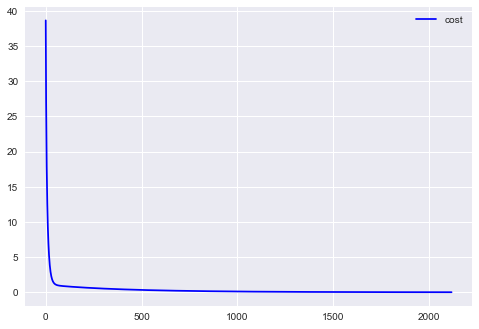

In [340]:
plt.style.use("seaborn")
plt.plot([*range(len(cost))], cost, color="blue",label="cost")
plt.legend()
plt.show()

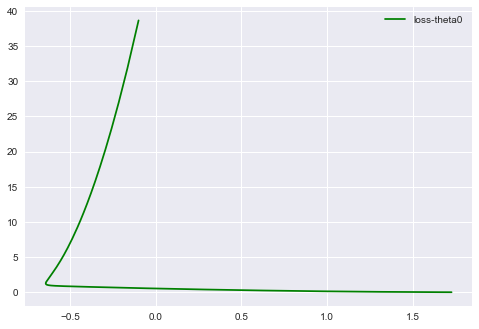

In [341]:
plt.plot(thetall_0, cost, color="green",label="loss-theta0")
plt.legend()
plt.show()

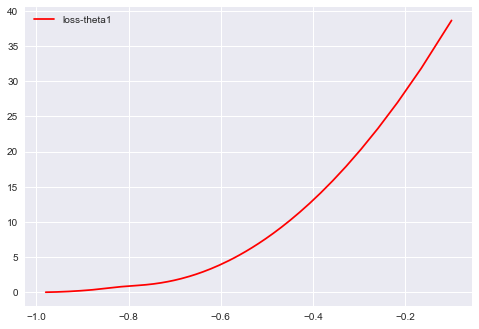

In [342]:
plt.plot(thetall_1, cost, color="red",label="loss-theta1")
plt.legend()
plt.show()

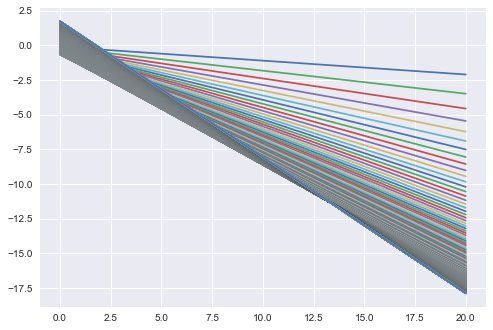

In [343]:
for i in range(len(h_theta_all)):
    plt.plot(X, h_theta_all[i])
plt.show()

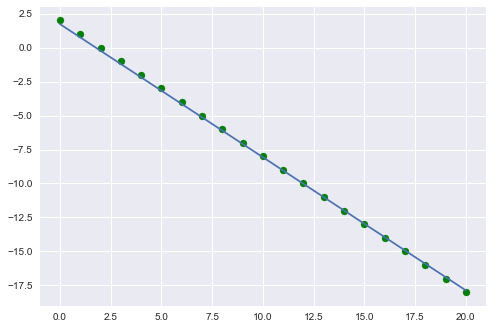

In [344]:
plt.plot(X, h_theta_all[-1])
plt.scatter(X, Y, color="green")
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

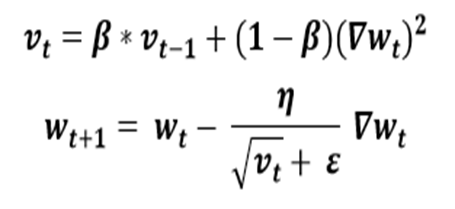

In [345]:
def rms_prop(x, y, alpha, epslon, beta, itera, b):
    theta_all = []
    cost = []
    h_theta_all = []
    X = np.array([float(i) for i in x])
    Y = np.array([float(i) for i in y])
    theta = np.array([0.0,0.0])
    Vt = np.array([0.0,0.0])
    cost_new = 0
    cost_func = 0
    n = len(X)
    feature = np.array([np.ones(n),X]).T
    h_theta = feature.dot(theta)
    j = 0
    while ((j < itera) and (abs(cost_new)> 0.01 or j == 0)):
        cost_func = cost_new
        for i in range(0,int(n/b)):

            Wt_0 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),0])

            Vt[0] = beta * Vt[0] + (1 - beta) * (Wt_0)**2
            theta[0] = theta[0] - (alpha / (np.sqrt(Vt[0]) + epslon)) * Wt_0
            #====================================================#

            Wt_1 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),1])

            Vt[1] = beta * Vt[1] + (1 - beta) * (Wt_1)**2
            theta[1] = theta[1] - (alpha / (np.sqrt(Vt[1]) + epslon)) * Wt_1

            h_theta = feature.dot(theta)

            cost_new = (1/(2*n))*sum((h_theta - Y)**2)
        theta_all.append([theta[0],theta[1]])
        cost.append(cost_new)
        h_theta_all.append(h_theta)
        j = j+1
    print(j)
    return np.array(theta_all)[:,0],np.array(theta_all)[:,1],cost, h_theta_all, theta[0], theta[1]
    

## First try in RMS_Prop

In [346]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = rms_prop(X,Y, 0.001, 10e-8, 0.7,1000,len(X))

1000


In [347]:
r2_score(Y, h_theta_all[-1])

0.9561760886447053

## Second try in RMS_Prop

In [348]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = rms_prop(X,Y, 0.01, 10e-8, 0.5,1000,len(X))

333


In [349]:
r2_score(Y, h_theta_all[-1])

0.9994759389679374

## Third try in RMS_Prop

In [350]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = rms_prop(X,Y, 0.01, 10e-8, 0.8,1000,len(X))

339


In [351]:
r2_score(Y, h_theta_all[-1])

0.9994569755814382

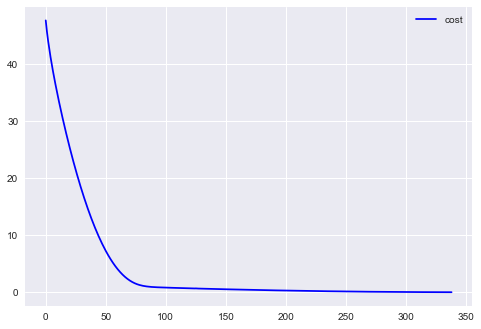

In [352]:
plt.style.use("seaborn")
plt.plot([*range(len(cost))], cost, color="blue",label="cost")
plt.legend()
plt.show()

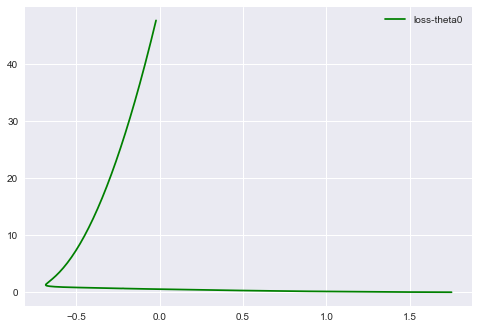

In [353]:
plt.plot(thetall_0, cost, color="green",label="loss-theta0")
plt.legend()
plt.show()

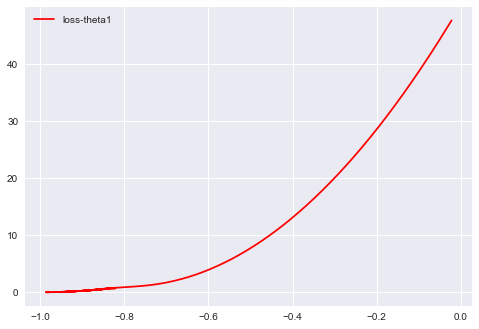

In [354]:
plt.plot(thetall_1, cost, color="red",label="loss-theta1")
plt.legend()
plt.show()

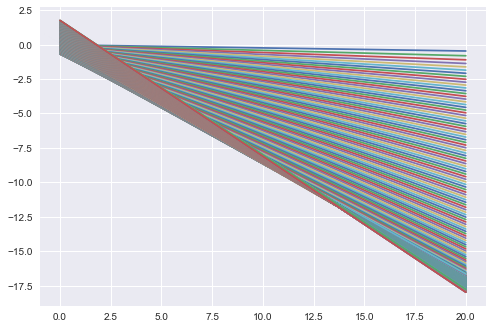

In [355]:
for i in range(len(h_theta_all)):
    plt.plot(X, h_theta_all[i])
plt.show()

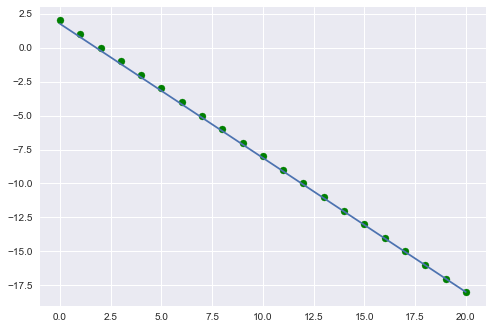

In [356]:
plt.plot(X, h_theta_all[-1])
plt.scatter(X, Y, color="green")
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

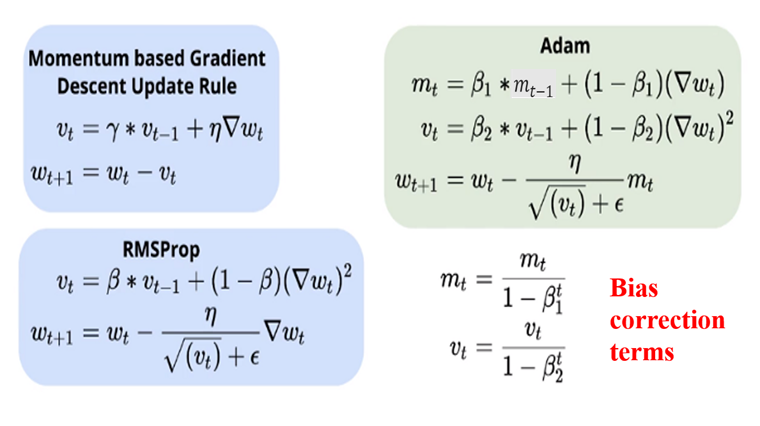

In [357]:
def adam(x, y, alpha, epslon, beta_1, beta_2, itera, b):
    theta_all = []
    cost = []
    h_theta_all = []
    X = np.array([float(i) for i in x])
    Y = np.array([float(i) for i in y])
    theta = np.array([0.0,0.0])
    Vt = np.array([0.0,0.0])
    mt = np.array([0.0,0.0])
    cost_new = 0
    cost_func = 0
    n = len(X)
    feature = np.array([np.ones(n),X]).T
    h_theta = feature.dot(theta)
    j = 0
    while  (j < itera) and (abs(cost_new)> 0.01 or j == 0):
        cost_func = cost_new
        for i in range(0,int(n/b)):

            Wt_0 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),0])
            mt[0] =beta_1 * mt[0] + (1-beta_1) * Wt_0

            Vt[0] = beta_2 * Vt[0] + (1-beta_2) * ((Wt_0)**2)
            mt[0] = mt[0] / (1-beta_1**(j+1))
            Vt[0] = Vt[0] / (1-beta_2**(j+1))
            theta[0] = theta[0] - (alpha / (np.sqrt(Vt[0]) + epslon)) * mt[0]
            #====================================================#

            Wt_1 = (1/(n)) * sum ((h_theta[b*i:b*(i+1)].T-Y[b*i:b*(i+1)]) * feature[b*i:b*(i+1),1])
            mt[1] =beta_1 * mt[1] + (1-beta_1) * Wt_1

            Vt[1] = beta_2 * Vt[1] + (1-beta_2) * ((Wt_1)**2)
            mt[1] = mt[1] /(1-beta_1**(j+1))
            Vt[1] = Vt[1] / (1-beta_2**(j+1))
            theta[1] = theta[1] - (alpha / (np.sqrt(Vt[1]) + epslon)) * mt[1]

            h_theta = feature.dot(theta)

            cost_new = (1/(2*n))*sum((h_theta - Y)**2)
        theta_all.append([theta[0],theta[1]])
        cost.append(cost_new)
        h_theta_all.append(h_theta)
        j +=1
    print(j)
    return np.array(theta_all)[:,0],np.array(theta_all)[:,1],cost, h_theta_all, theta[0], theta[1]

## First try in Adam

In [358]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = adam(X,Y, 0.001, 10e-8, 0.8, 0.9, 1000, len(X))

1000


In [359]:
r2_score(Y, h_theta_all[-1])

0.9525178420166223

## Second try in Adam

In [360]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = adam(X,Y, 0.001, 10e-8, 0.9, 0.95, 1000, len(X))

1000


In [361]:
r2_score(Y, h_theta_all[-1])

0.645264452903753

## Third tye in Adam

In [362]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = adam(X,Y, 0.01, 10e-8, 0.9, 0.95, 1000, len(X))

873


In [363]:
r2_score(Y, h_theta_all[-1])

0.999457822387285

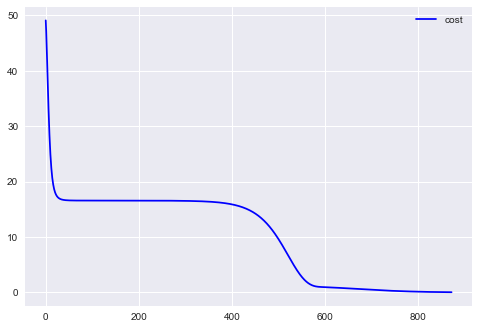

In [364]:
plt.style.use("seaborn")
plt.plot([*range(len(cost))], cost, color="blue",label="cost")
plt.legend()
plt.show()

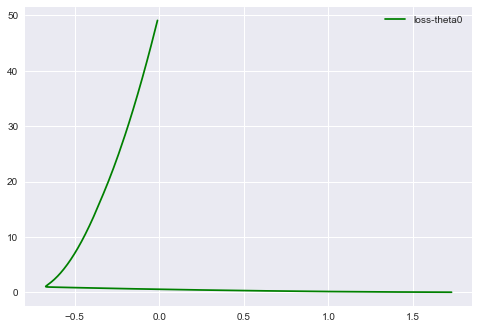

In [365]:
plt.plot(thetall_0, cost, color="green",label="loss-theta0")
plt.legend()
plt.show()

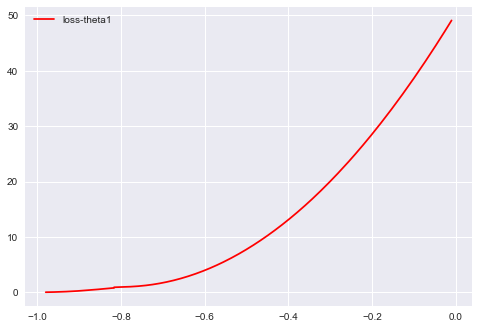

In [366]:
plt.plot(thetall_1, cost, color="red",label="loss-theta1")
plt.legend()
plt.show()

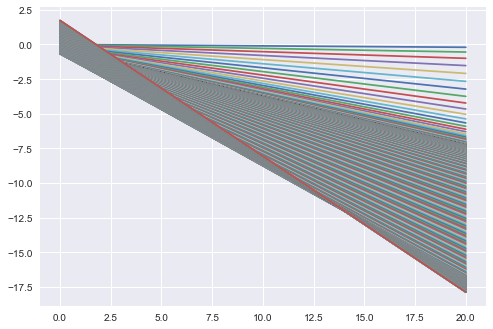

In [367]:
for i in range(len(h_theta_all)):
    plt.plot(X, h_theta_all[i])
plt.show()

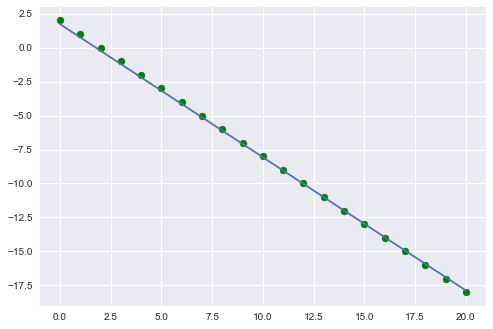

In [368]:
plt.plot(X, h_theta_all[-1])
plt.scatter(X, Y, color="green")
plt.show()

## Compare between different Algorithms (no. of iterations, r2_score)

In [369]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = adagrad(X,Y, 0.01, 10e-8, 1000, len(X))

1000


In [370]:
r2_score(Y, h_theta_all[-1])

0.6074136034566675

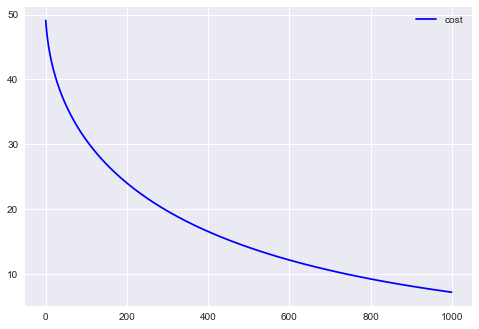

In [371]:
plt.style.use("seaborn")
plt.plot([*range(len(cost))], cost, color="blue",label="cost")
plt.legend()
plt.show()

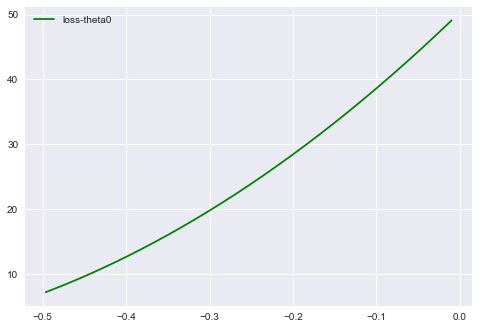

In [372]:
plt.plot(thetall_0, cost, color="green",label="loss-theta0")
plt.legend()
plt.show()

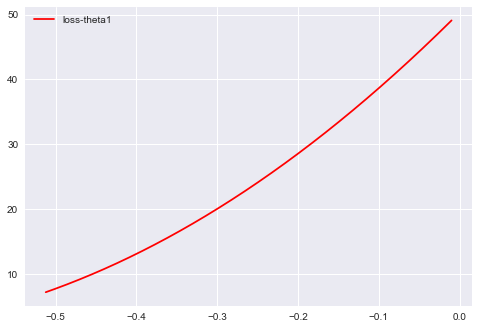

In [373]:
plt.plot(thetall_1, cost, color="red",label="loss-theta1")
plt.legend()
plt.show()

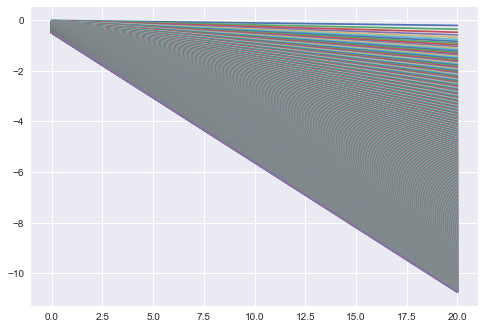

In [374]:
for i in range(len(h_theta_all)):
    plt.plot(X, h_theta_all[i])
plt.show()

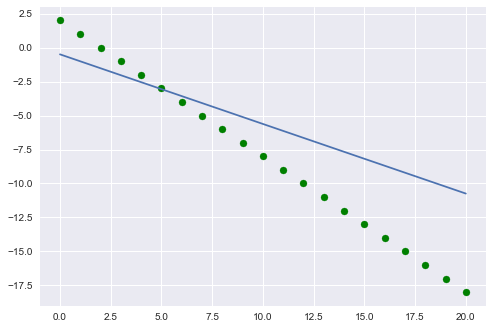

In [375]:
plt.plot(X, h_theta_all[-1])
plt.scatter(X, Y, color="green")
plt.show()

### RMS_Prop

In [376]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = rms_prop(X,Y, 0.01, 10e-8, 0.8,1000,len(X))

339


In [377]:
r2_score(Y, h_theta_all[-1])

0.9994569755814382

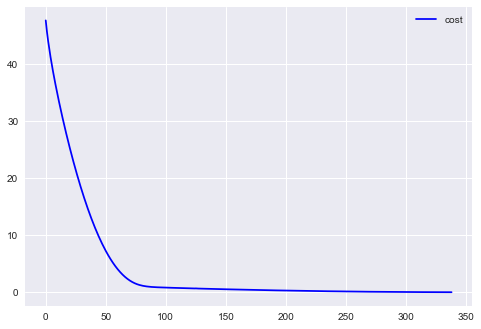

In [378]:
plt.style.use("seaborn")
plt.plot([*range(len(cost))], cost, color="blue",label="cost")
plt.legend()
plt.show()

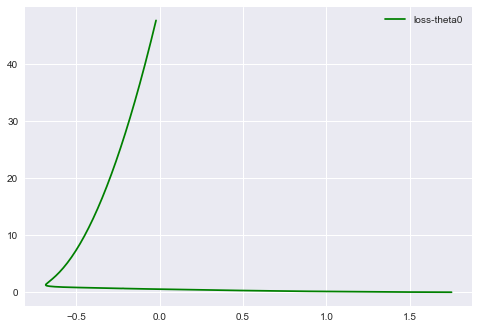

In [379]:
plt.plot(thetall_0, cost, color="green",label="loss-theta0")
plt.legend()
plt.show()

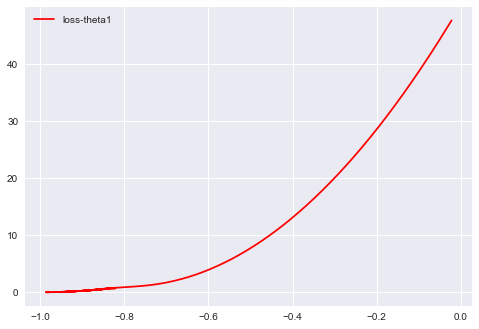

In [380]:
plt.plot(thetall_1, cost, color="red",label="loss-theta1")
plt.legend()
plt.show()

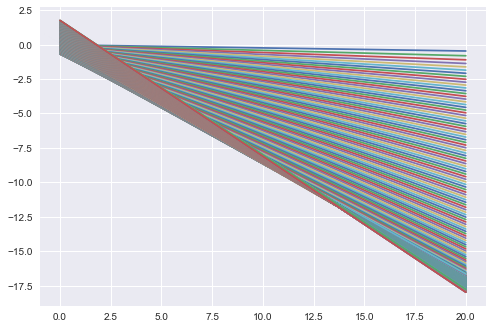

In [381]:
for i in range(len(h_theta_all)):
    plt.plot(X, h_theta_all[i])
plt.show()

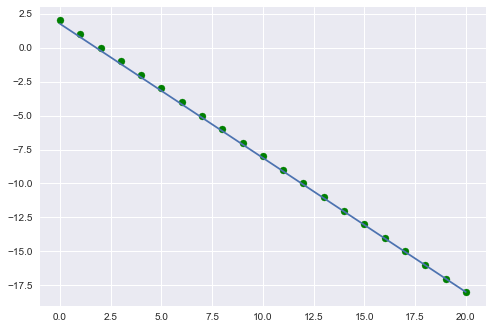

In [382]:
plt.plot(X, h_theta_all[-1])
plt.scatter(X, Y, color="green")
plt.show()

In [383]:
thetall_0, thetall_1, cost, h_theta_all, theta_0 , theta_1 = adam(X,Y, 0.01, 10e-8, 0.8, 0.95, 1000, len(X))

898


In [384]:
r2_score(Y, h_theta_all[-1])

0.9994688860388409

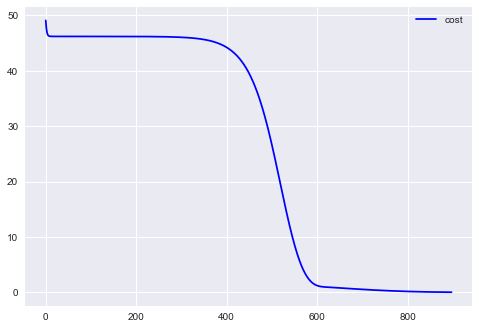

In [385]:
plt.style.use("seaborn")
plt.plot([*range(len(cost))], cost, color="blue",label="cost")
plt.legend()
plt.show()

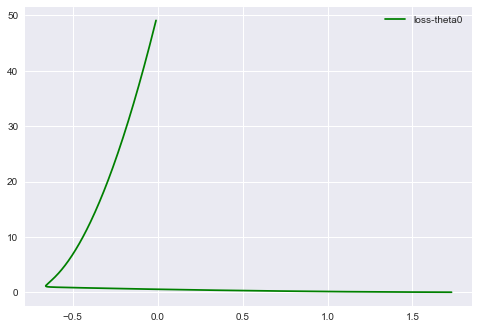

In [386]:
plt.plot(thetall_0, cost, color="green",label="loss-theta0")
plt.legend()
plt.show()

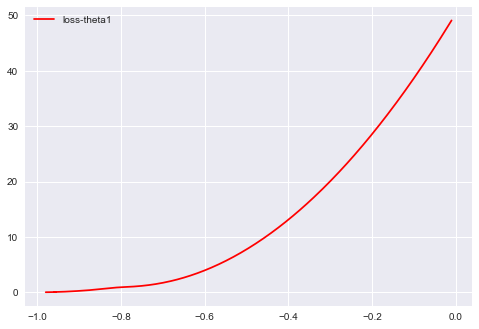

In [387]:
plt.plot(thetall_1, cost, color="red",label="loss-theta1")
plt.legend()
plt.show()

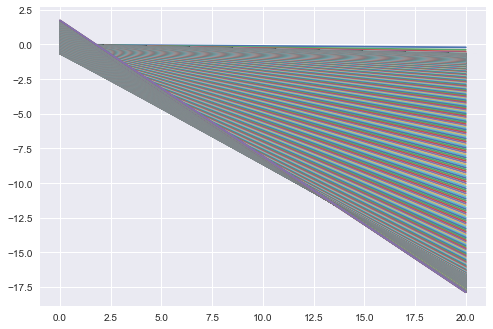

In [388]:
for i in range(len(h_theta_all)):
    plt.plot(X, h_theta_all[i])
plt.show()

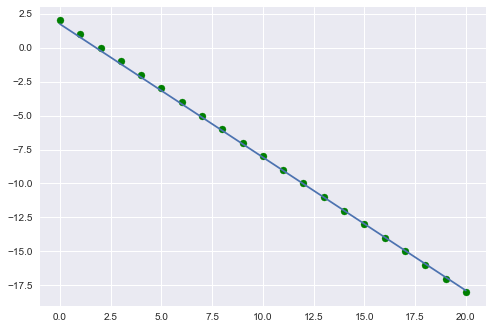

In [389]:
plt.plot(X, h_theta_all[-1])
plt.scatter(X, Y, color="green")
plt.show()